In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load cleaned data
enrolment_df = pd.read_csv("../data/clean_enrolment.csv")
biometric_df = pd.read_csv("../data/clean_biometric.csv")
demographic_df = pd.read_csv("../data/clean_demographic.csv")

# Convert date columns
enrolment_df["date"] = pd.to_datetime(enrolment_df["date"])
biometric_df["date"] = pd.to_datetime(biometric_df["date"])
demographic_df["date"] = pd.to_datetime(demographic_df["date"])


<Figure size 1000x500 with 0 Axes>

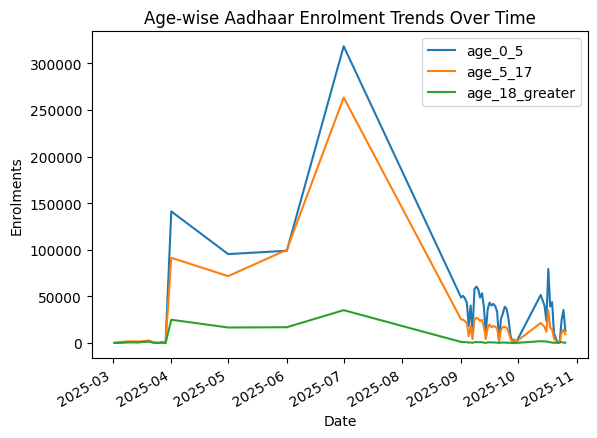

In [2]:
age_time = enrolment_df.groupby("date")[["age_0_5", "age_5_17", "age_18_greater"]].sum()

plt.figure(figsize=(10, 5))
age_time.plot()
plt.title("Age-wise Aadhaar Enrolment Trends Over Time")
plt.xlabel("Date")
plt.ylabel("Enrolments")
plt.show()


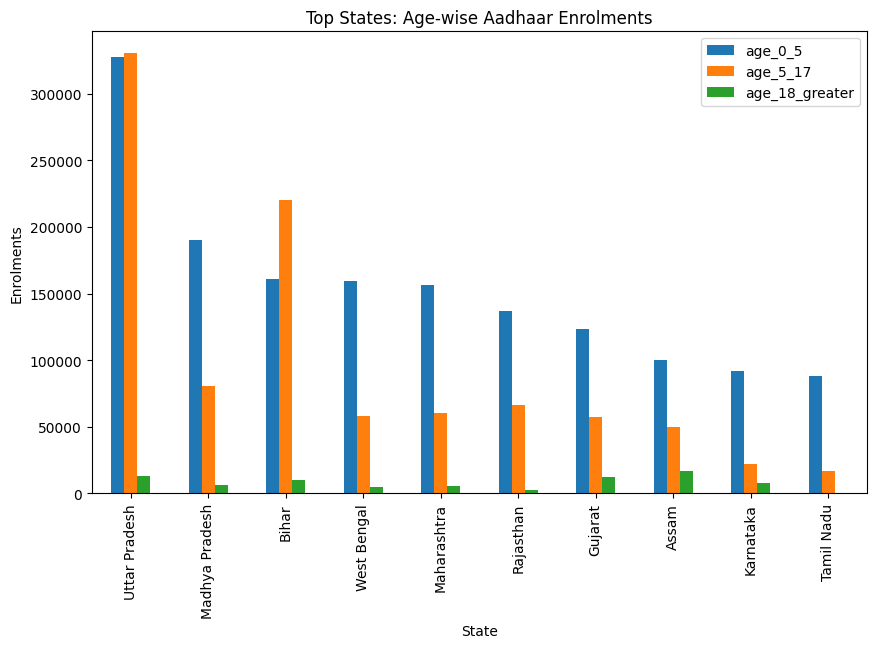

In [3]:
state_age = (
    enrolment_df
    .groupby("state")[["age_0_5", "age_5_17", "age_18_greater"]]
    .sum()
    .sort_values(by="age_0_5", ascending=False)
    .head(10)
)

state_age.plot(kind="bar", figsize=(10, 6))
plt.title("Top States: Age-wise Aadhaar Enrolments")
plt.xlabel("State")
plt.ylabel("Enrolments")
plt.show()


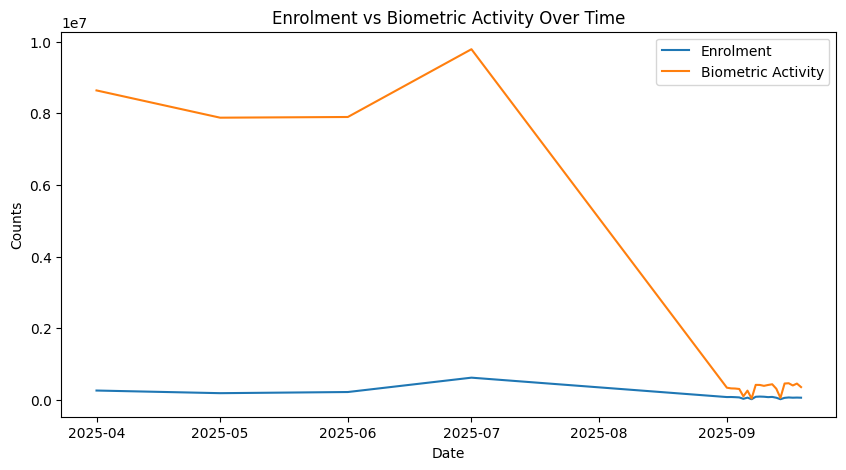

In [4]:
# Aggregate both by date
enrol_time = enrolment_df.groupby("date")["total_enrolment"].sum()
bio_time = biometric_df.groupby("date")["total_biometric_activity"].sum()

combined = pd.concat([enrol_time, bio_time], axis=1).dropna()
combined.columns = ["enrolment", "biometric"]

plt.figure(figsize=(10, 5))
plt.plot(combined.index, combined["enrolment"], label="Enrolment")
plt.plot(combined.index, combined["biometric"], label="Biometric Activity")
plt.legend()
plt.title("Enrolment vs Biometric Activity Over Time")
plt.xlabel("Date")
plt.ylabel("Counts")
plt.show()


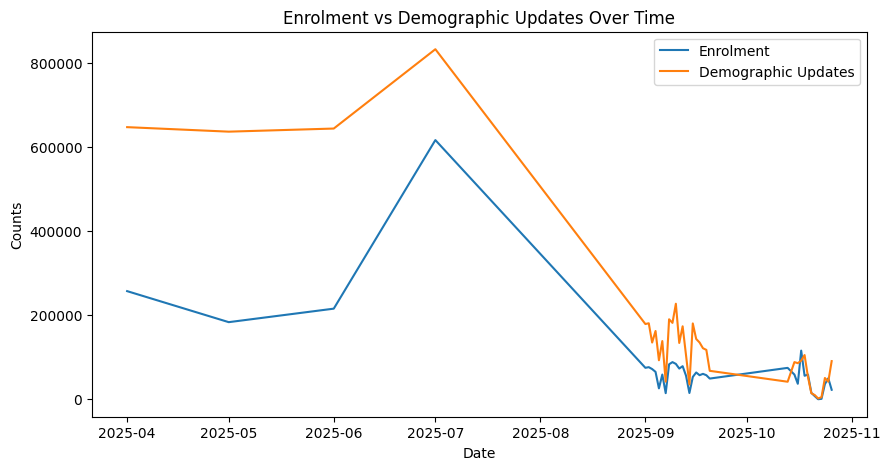

In [5]:
demo_time = demographic_df.groupby("date")["total_demographic_updates"].sum()

combined_demo = pd.concat([enrol_time, demo_time], axis=1).dropna()
combined_demo.columns = ["enrolment", "demographic"]

plt.figure(figsize=(10, 5))
plt.plot(combined_demo.index, combined_demo["enrolment"], label="Enrolment")
plt.plot(combined_demo.index, combined_demo["demographic"], label="Demographic Updates")
plt.legend()
plt.title("Enrolment vs Demographic Updates Over Time")
plt.xlabel("Date")
plt.ylabel("Counts")
plt.show()
